In [144]:
import pandas
import numpy as np
from sklearn.metrics import roc_auc_score
from IPython.display import FileLink, FileLinks

In [145]:
# 1 image has 16x16 pixels = 256 pixels
pixels = ["pixel_{0}".format(i) for i in range(36)]

def to_image(df):
    return  np.expand_dims(np.expand_dims(df[pixels], axis=-1).reshape(-1,6,6), axis=-1)


store_train = pandas.HDFStore("pixelTrain.h5")

df_train = store_train.select("df",stop=-1)
df_train = df_train[(df_train["GenDeltaR"]<0.1) & (df_train["nUniqueSimTracksInSharedHit"]>-1)]


store_test = pandas.HDFStore("pixelTrain30k.h5")

df_test = store_test.select("df",stop=-1)
df_test = df_test[(df_test["GenDeltaR"]<0.1) & (df_test["nUniqueSimTracksInSharedHit"]>-1)]#print(df_test)
images_test = to_image(df_test)


# Make all test, train data merged hit
df_test = df_test[(df_test["isSharedHit"]>0)]
df_train = df_train[(df_train["isSharedHit"]>0)]

In [146]:
# Check that all are merged hits i.e. isSharedHit=1
print df_test['isSharedHit'].head()

print df_train['isSharedHit'].head()

25    1
30    1
39    1
69    1
92    1
Name: isSharedHit, dtype: int32
4     1
9     1
10    1
12    1
21    1
Name: isSharedHit, dtype: int32


In [147]:
print df_test.shape
print df_train.shape

# Remove overlap between train and test data
df_combined = pandas.concat([df_test, df_train]).drop_duplicates(keep=False)
df_combined.shape


# New combined files
df_train=df_combined.sample(frac=0.6)
df_test=df_combined.drop(df_train.index)

# Make all test, train data merged hit
df_test = df_test[(df_test["isSharedHit"]>0)]
df_train = df_train[(df_train["isSharedHit"]>0)]

df_train = df_train[(df_train["GenDeltaR"]<0.1) & (df_train["nUniqueSimTracksInSharedHit"]>-1)]


images_train = to_image(df_train)
images_test = to_image(df_test)

(58, 42)
(267, 42)


In [148]:
print df_test.shape
print df_train.shape

(115, 42)
(173, 42)


In [149]:
# Adding isMergedHit column 

merged_hit = df_train["nUniqueSimTracksInSharedHit"]>1
merged_int = merged_hit.astype(int)
df_train.insert(0, "isMergedHit", merged_int, True)

#df_train.head()

merged_hit_test = df_test["nUniqueSimTracksInSharedHit"]>1
merged_int_test = merged_hit_test.astype(int)
df_test.insert(0, "isMergedHit", merged_int_test, True)

df_test.head()

,isMergedHit,isSharedHit,trackPt,trackEta,trackPhi,nUniqueSimTracksInSharedHit,GenDeltaR,pixel_0,pixel_1,pixel_2,...,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35
69,1,1,1.330709,-2.043563,1.330709,2.0,0.043240,0.0,0.0,0.087983,...,0.083277,0.139740,0.0,0.0,0.0,0.0,0.04586,0.090908,0.0,0.0
119,1,1,4.657765,-1.873906,4.657765,2.0,0.005257,0.0,0.0,0.000000,...,0.254677,0.101919,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
140,0,1,4.689703,-2.010829,4.689703,1.0,0.032041,0.0,0.0,0.000000,...,0.000000,0.193271,0.0,0.0,0.0,0.0,0.00000,0.182736,0.0,0.0
228,0,1,13.573482,-0.220184,13.573482,1.0,0.003009,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
331,1,1,1.467527,-2.182899,1.467527,2.0,0.003103,0.0,0.0,0.000000,...,0.000000,0.222396,0.0,0.0,0.0,0.0,0.00000,0.190251,0.0,0.0


In [150]:
# Check for overlap
pandas.merge(df_train, df_test, on=[x for x in df_train.columns], how='inner')

,isMergedHit,isSharedHit,trackPt,trackEta,trackPhi,nUniqueSimTracksInSharedHit,GenDeltaR,pixel_0,pixel_1,pixel_2,...,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35


In [151]:
from sklearn.model_selection import train_test_split
X = df_train.iloc[:,np.r_[1:4, 6:43]]
Y = df_train['isMergedHit']
#train_SharedHit = images_train['isMergedHit']

x_final_test = df_test.iloc[:,np.r_[1:4, 6:43]]
y_final_test = df_test['isMergedHit']

# Splitting train data into training and validation datasets
x_train, x_test, y_train_v, y_test_v = train_test_split(X, Y, test_size = 0.4, random_state = 2)

print 'Train data'
print Y.shape
print X.shape
print 'Test Data'
print y_final_test.shape
print x_final_test.shape

Train data
(173,)
(173, 40)
Test Data
(115,)
(115, 40)


In [152]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

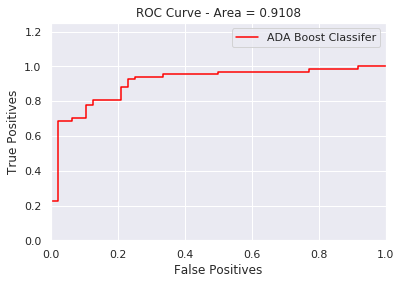

In [153]:
# ADABoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train_v)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

probs_ADA = ada.predict_proba(x_final_test)[:,1]

#ROC Curve

merged_array_ADA = df_test.as_matrix(columns=df_test.columns[:1])

fpr, tpr, thresholds = roc_curve(merged_array_ADA, probs_ADA)
auc_ADA = metrics.auc(fpr,tpr)
auc_ADA = round(auc_ADA, 4)
plt.xlim(0, 1.0)
plt.ylim(0, 1.25)
plt.plot(fpr,tpr, color='red', label='ADA Boost Classifer')
plt.title("ROC Curve - Area = "+str(auc_ADA))
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.legend()
plt.show()

Confusion Matrix


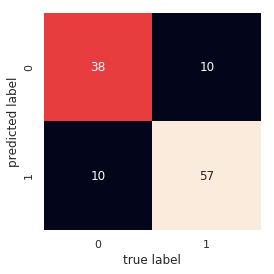

In [154]:
# Not very important, confusion matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_final_test_pred = ada.predict(x_final_test)

print 'Confusion Matrix'
mat = confusion_matrix(y_final_test, y_final_test_pred) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [163]:
#ada.predict(x_train)
#ada.decision_function(x_train)
signal = probs_ADA[df_test["isMergedHit"]==1]
background = probs_ADA[df_test["isMergedHit"]==0]

probs_ADA_train = ada.predict_proba(x_train)
signal_train = probs_ADA[df_train["isMergedHit"]==1]
background_train = probs_ADA[df_train["isMerged"]==0]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 115 but corresponding boolean dimension is 173

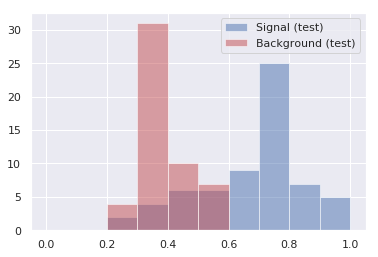

In [156]:
plt.hist(signal, bins = 10, alpha = 0.5, color = 'b', label = 'Signal (test)', range = (0,1))
plt.hist(background, bins = 10, alpha = 0.5, color = 'r', label = 'Background (test)', range = (0,1))
plt.legend(loc='best')

In [157]:
#print signal
#print background
print 'signal'
print np.histogram(signal)
print 'background'
print np.histogram(background)

signal
(array([ 4,  2,  5,  5,  3,  8, 24,  4,  3,  6]), array([0.27715441, 0.34436608, 0.41157775, 0.47878941, 0.54600108,
       0.61321275, 0.68042442, 0.74763609, 0.81484775, 0.88205942,
       0.94927109]))
background
(array([ 4,  1,  9, 16, 10,  2,  3,  2,  2,  3]), array([0.26663376, 0.29787436, 0.32911495, 0.36035555, 0.39159614,
       0.42283674, 0.45407733, 0.48531792, 0.51655852, 0.54779911,
       0.57903971]))
